<a href="https://colab.research.google.com/github/singhv04/head_detection/blob/master/custom_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


#importing libraries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from IPython.display import clear_output
import copy

#path setting

In [3]:
!ls

drive  sample_data


In [4]:
%cd ./drive/My\ Drive/

/content/drive/My Drive


In [5]:
!ls

'Colab Notebooks'   dataset		   imagesx   Perceptron.gdoc
 darknet	   'Getting started.pdf'   labelsx   research


In [0]:
#cloning the darknet yolo

In [0]:
#!git clone https://github.com/pjreddie/darknet

In [6]:
%cd ./darknet/

/content/drive/My Drive/darknet


In [7]:
!ls

backup		       libdarknet.a   Makefile		   src
cfg		       libdarknet.so  obj		   test.txt
darknet		       LICENSE	      obj.data		   train.txt
darknet19_448.conv.23  LICENSE.fuck   obj.names		   v2
darknet53.conv.74      LICENSE.gen    predictions.jpg	   v3
data		       LICENSE.gpl    python		   x1.jpg
examples	       LICENSE.meta   README.md		   x2.jpg
images		       LICENSE.mit    results		   yolov3.weights
include		       LICENSE.v1     results_test_yolov2
labels		       log	      scripts


#setting up darknet

In [0]:
#!make

In [0]:
!chmod 777 ./darknet

In [9]:
!./darknet

usage: ./darknet <function>


In [0]:
#!wget https://pjreddie.com/media/files/yolov3.weights

--2019-05-27 05:16:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.2MB/s    in 8.1s    

2019-05-27 05:16:26 (29.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
#!ls

backup		       labels	      LICENSE.v1       scripts
cfg		       libdarknet.a   Makefile	       src
darknet		       libdarknet.so  obj	       test.txt
darknet19_448.conv.23  LICENSE	      obj.data	       train.txt
darknet53.conv.74      LICENSE.fuck   obj.names        v3
data		       LICENSE.gen    predictions.jpg  yolov3.weights
examples	       LICENSE.gpl    python
images		       LICENSE.meta   README.md
include		       LICENSE.mit    results


In [0]:
#%cd ./darknet/

/content/drive/My Drive/darknet


In [0]:
#!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

#checking the pre-trained model

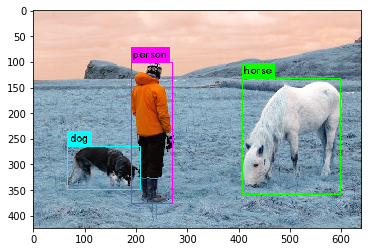

In [0]:
"""
img = cv2.imread("predictions.jpg")
plt.imshow(img)
plt.show()
"""

#downloading pre-trained weights for custom object dataset

In [0]:
#for yolov3
#!wget https://pjreddie.com/media/files/darknet53.conv.74
#for yolov2
#!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2019-05-27 05:56:27--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  4.40MB/s    in 18s     

2019-05-27 05:56:45 (8.83 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
#%cd ..

In [0]:
#!ls

#splitting the traing-testing data

In [0]:
"""
#test_train_split
import glob, os
# Current directory

current_dir = './images'
# Percentage of images to be used for the test set
percentage_test = 10;
# Create and/or truncate train.txt and test.txt
file_train = open('train.txt', 'w')  
file_test = open('test.txt', 'w')
# Populate train.txt and test.txt
counter = 1  
i_c=0
index_test = round(100 / percentage_test)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):
  i_c+=1
  title, ext = os.path.splitext(os.path.basename(pathAndFilename))
  if counter == index_test:
    counter = 1
    file_test.write(current_dir + "/" + title + '.jpg' + "\n")
  else:
    file_train.write(current_dir + "/" + title + '.jpg' + "\n")
    counter = counter + 1
"""

In [10]:
!ls

backup		       libdarknet.a   Makefile		   src
cfg		       libdarknet.so  obj		   test.txt
darknet		       LICENSE	      obj.data		   train.txt
darknet19_448.conv.23  LICENSE.fuck   obj.names		   v2
darknet53.conv.74      LICENSE.gen    predictions.jpg	   v3
data		       LICENSE.gpl    python		   x1.jpg
examples	       LICENSE.meta   README.md		   x2.jpg
images		       LICENSE.mit    results		   yolov3.weights
include		       LICENSE.v1     results_test_yolov2
labels		       log	      scripts


#training the model and saving the log file in log

In [0]:
#!./darknet detector train obj.data cfg/yolov2.cfg darknet19_448.conv.23 2>&1 | tee log/log_v2.txt
#!./darknet detector train obj.data cfg/yolov2.cfg darknet19_448.conv.23

#plotting graph

In [0]:
file=open("log/log_v2.txt")

s=[]
for line in file:
    s.append(line.strip())


In [0]:
s[-5:]

['Loaded: 0.000048 seconds',
 'Region Avg IOU: 0.054678, Class: 1.000000, Obj: 0.085287, No Obj: 0.015299, Avg Recall: 0.000000,  count: 19',
 '1324: 33.750881, 21.108570 avg, 0.001000 rate, 0.177327 seconds, 1324 images',
 'Loaded: 0.000059 seconds',
 'Region Avg IOU: 0.083566, Class: 1.000000, Obj: 0.051508, No Obj: 0.016206, A']

In [0]:
num=[]
for i in range(0,10):
    num.append(str(i))

In [0]:
s1=[]

cond=''
for i in range(0,len(s)):
    counter=0
    cond=''
    for j in range(0,len(s[i])):
        if s[i][j] in num:
            counter+=1
        else:
            if s[i][j]==':' and s[i][j-1] in num:
                cond='true'
                #print(s[i][counter+1:s[i].index('avg')])
                try:
                  s1.append(s[i][counter+1:s[i].index('avg')])
                except:
                  print(s[i])
                  print(i)

487: 20.6Saving weights to backup//yolov2.backup
1603
: 4
2611
: 0.006310, Avg Recall: 0.000000,  count: 1
2927
1286: 11.085176, 16.66Saving weights to backup//yolov2.backup
4173


In [0]:
s1_train=[]
s1_valid=[]


for i in range(0,len(s1)):
    templ=[]
    temp=s1[i].strip()
    templ=temp.split(',')
    #print(float(templ[0]))
    #rint(float(templ[1]))
    s1_train.append(float(templ[0]))
    s1_valid.append(float(templ[1]))

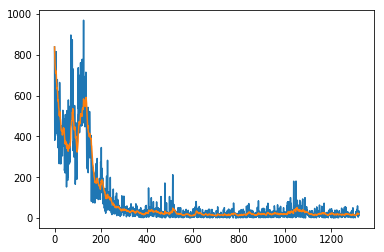

In [0]:
t=[]
for i in range(0,len(s1)):
    t.append(i)
    
plt.plot(t,s1_train)

plt.plot(t,s1_valid)


Text(0, 0.5, 'loss')

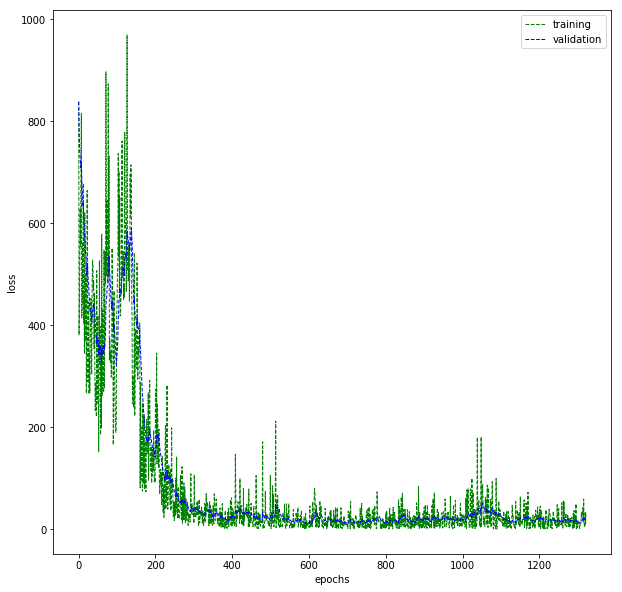

In [0]:
plt.figure(figsize=(10,10))

plt.plot(t, s1_train, color='green', linestyle='dashed', linewidth = 1, 
         marker='', markerfacecolor='blue', markersize=2) 

plt.plot(t, s1_valid, color='blue', linestyle='dashed', linewidth = 1, 
         marker='', markerfacecolor='blue', markersize=2)

plt.gca().legend(('training','validation'))

# naming the x axis 
plt.xlabel('epochs') 
# naming the y axis 
plt.ylabel('loss') 

In [0]:
#!./darknet detector train obj.data cfg/yolov2.cfg backup/yolov2.backup >> log/log_v2_1.txt

In [0]:
#!./darknet detector test cfg/obj.data cfg/yolov3.cfg backup/yolov3_900.weights data/2.jpg

In [0]:
#!./darknet detector test cfg/obj.data cfg/yolov2.cfg backup/yolov2_10000.weights data/5.jpg

#tesing the model

In [0]:
"""
for i in range(1,6):
  rs=str(i)+'r.jpg'
  !./darknet detector test cfg/obj.data cfg/yolov2.cfg backup/yolov2_10000.weights data/"$i".jpg -thresh .20
  !echo "$rs"
  !cp predictions.jpg results/"$rs"
#!./darknet detector test cfg/obj.data cfg/yolov2.cfg backup/yolov2_10000.weights data/5.jpg -thresh .20
"""

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  32   ->   208 x 208 x  32
    2 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    4 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    5 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    6 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    7 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128
    8 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
    9 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128  0.177 BFLOPs
   10 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
   11 max          2 x 2 / 2    52 x  52 x 256   ->

In [0]:
!ls

backup		       labels	      LICENSE.v1       results_100_try1
cfg		       labelsx	      log	       results_yolov2
darknet		       libdarknet.a   Makefile	       results_yolov3
darknet19_448.conv.23  libdarknet.so  obj	       scripts
darknet53.conv.74      LICENSE	      obj.data	       src
data		       LICENSE.fuck   obj.names        test.txt
examples	       LICENSE.gen    predictions.jpg  train.txt
images		       LICENSE.gpl    python	       v2
imagesx		       LICENSE.meta   README.md        v3
include		       LICENSE.mit    results	       yolov3.weights


In [13]:
file =open('test.txt','r')

input_f=[]
for line in file:
  input_f.append(line.strip())
  print(line.strip())

len(input_f)

./images/PartA_00037.jpg
./images/PartA_00066.jpg
./images/PartA_00078.jpg
./images/PartA_00093.jpg
./images/PartA_00018.jpg
./images/PartA_00010.jpg
./images/PartA_00090.jpg
./images/PartA_00007.jpg
./images/PartA_00075.jpg
./images/PartA_00015.jpg


10

In [0]:
for i in range(0,len(input_f)):
  rs=input_f[i]
  rs1=rs[:-4]+'_result.jpg'
  rs1=rs1[9:]
  !./darknet detector test cfg/obj.data cfg/yolov2.cfg backup/yolov2_10000.weights "$rs" -thresh .20
  !echo "$rs"
  !cp predictions.jpg results/"$rs1"

In [0]:
output_v2=[]

z=os.listdir('./results_test_yolov2/')

for i in range(0,len(z)):
  temp='./results_test_yolov2/'+z[i]
  output_v2.append(np.array(cv2.imread(temp)))  

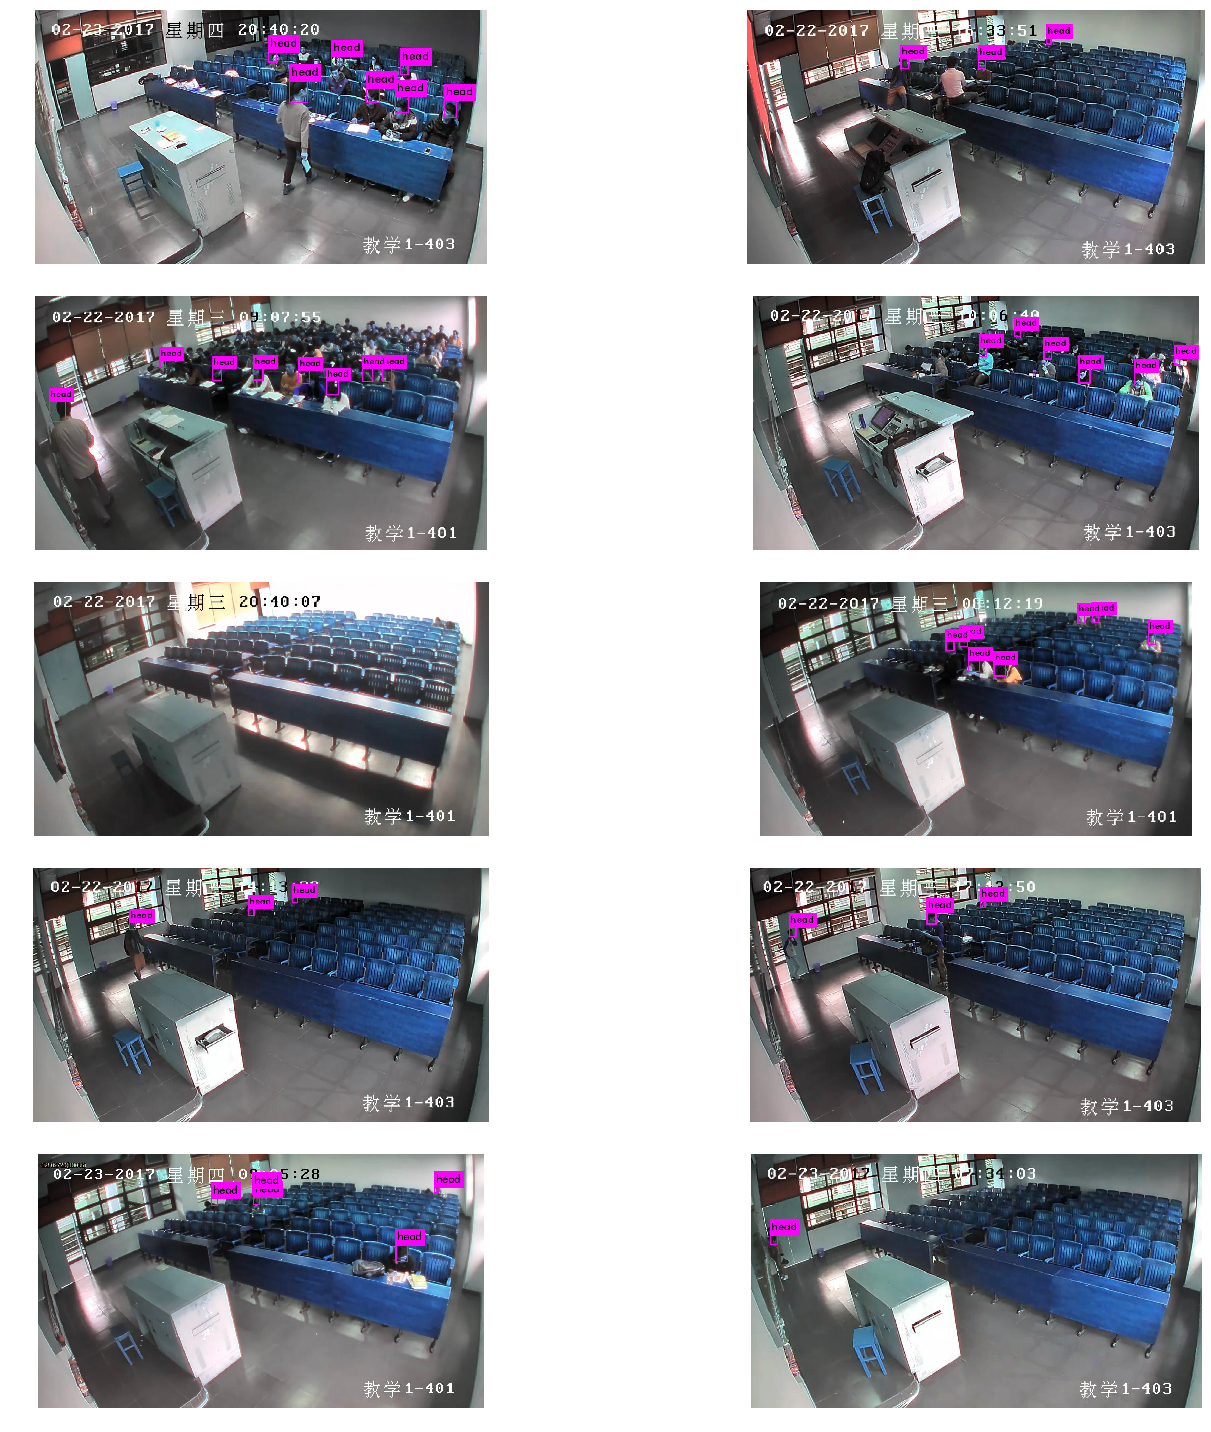

In [32]:
fig, axarr = plt.subplots(5,2,figsize=(20,20))
fig.tight_layout()

c=0
for i in range(0,5):
  for j in range(0,2):
    axarr[i,j].imshow(output_v2[c])
    axarr[i][j].axis('off')
    c=c+1

In [0]:
for i in range(0,len(input_f)):
  rs=input_f[i]
  rs1=rs[:-4]+'_result.jpg'
  rs1=rs1[9:]
  !./darknet detector test cfg/obj.data cfg/yolov3.cfg v3/yolov3_900.weights "$rs" -thresh .20
  !echo "$rs"
  !cp predictions.jpg results/"$rs1"


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [0]:
output_v3=[]

z=os.listdir('./results/')

for i in range(0,len(z)):
  temp='./results/'+z[i]
  output_v3.append(np.array(cv2.imread(temp)))  

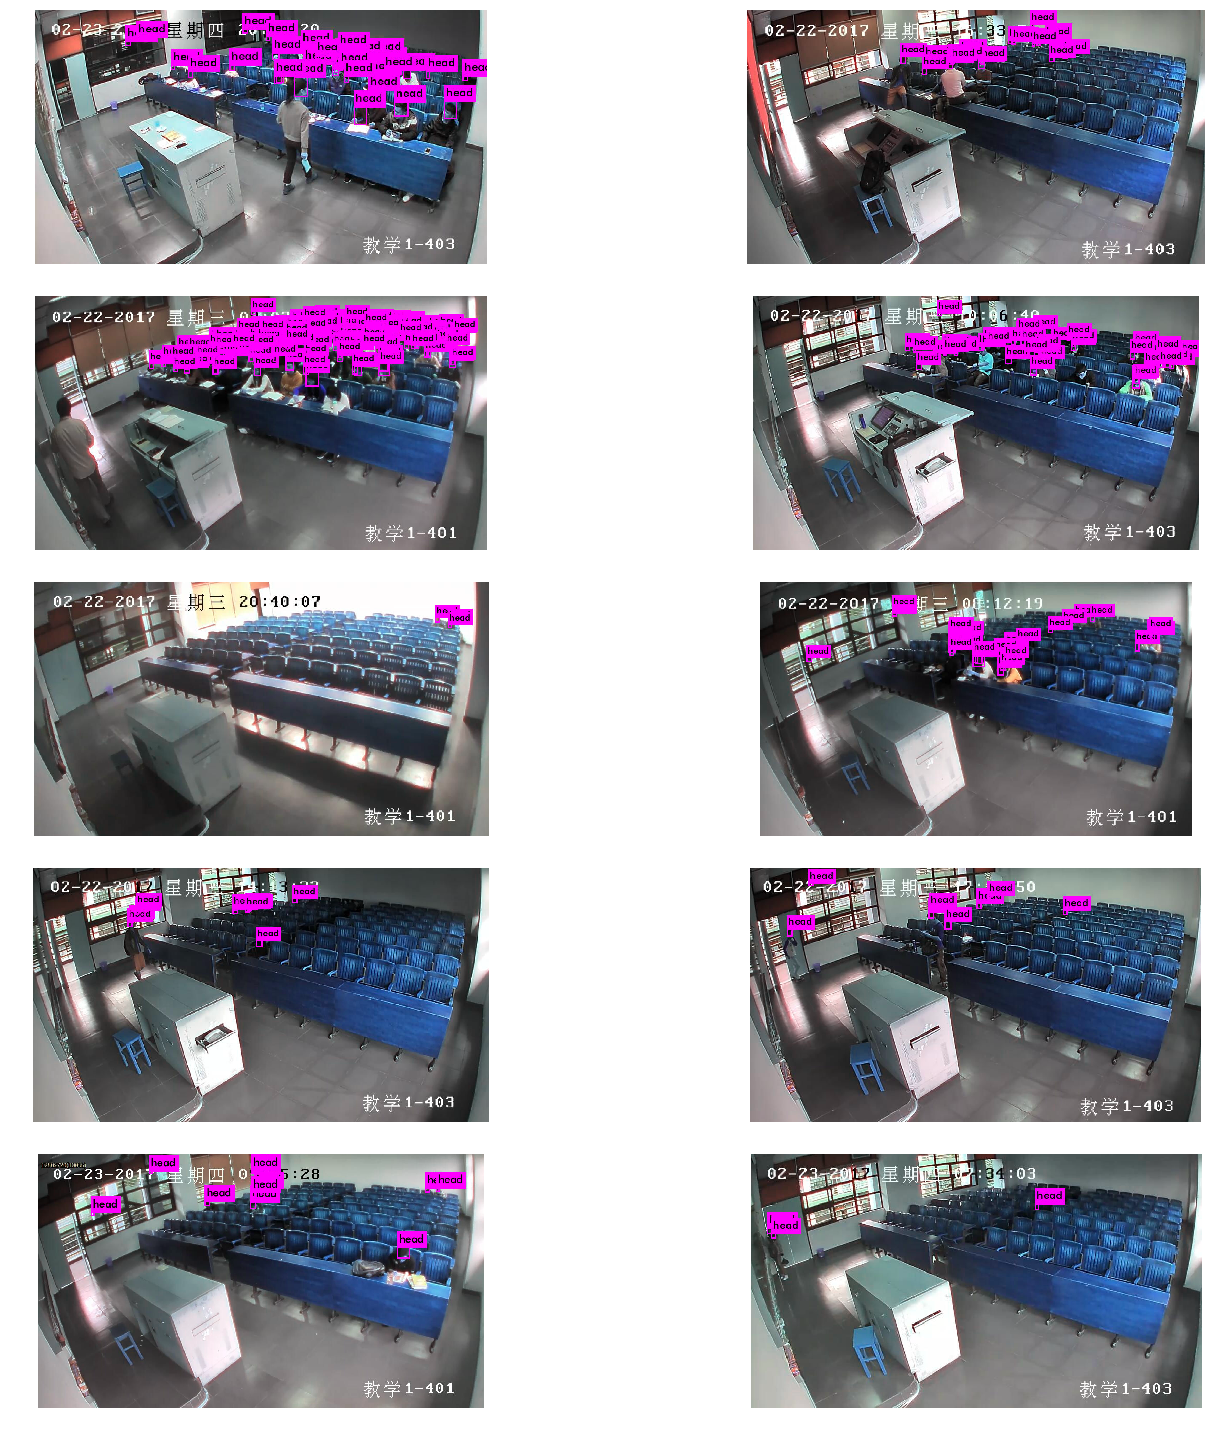

In [29]:
fig, axarr = plt.subplots(5,2,figsize=(20,20))
fig.tight_layout()

c=0
for i in range(0,5):
  for j in range(0,2):
    axarr[i,j].imshow(output_v3[c])
    axarr[i][j].axis('off')
    c=c+1

#testing on SCUT_HEAD_Part_B (which is never used for training)

In [14]:
!./darknet detector test cfg/obj.data cfg/yolov2.cfg backup/yolov2_10000.weights x2.jpg -thresh .20

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  32   ->   208 x 208 x  32
    2 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    4 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    5 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    6 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    7 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128
    8 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
    9 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128  0.177 BFLOPs
   10 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
   11 max          2 x 2 / 2    52 x  52 x 256   ->

In [0]:
#!cp predictions.jpg x2_v2_results.jpg

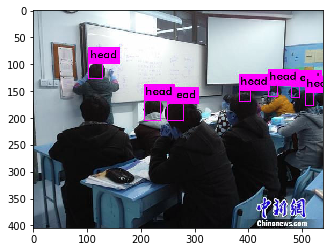

In [20]:
img = cv2.imread("x2_v2_results.jpg")
plt.imshow(img)
plt.show()